Imports

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd

call the train test datasets

In [2]:
train_dir = 'training_set'
test_dir = 'test_set'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)


# Creating training set
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 20,
                                                 class_mode = 'binary')
# Creating the Test set
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [4]:
"""train_data = keras.utils.image_dataset_from_directory(
    "training_set",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)
validation_data = keras.utils.image_dataset_from_directory(
    "test_set",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)"""

'train_data = keras.utils.image_dataset_from_directory(\n    "training_set",\n    labels="inferred",\n    label_mode="int",\n    batch_size=32,\n    image_size=(256, 256)\n)\nvalidation_data = keras.utils.image_dataset_from_directory(\n    "test_set",\n    labels="inferred",\n    label_mode="int",\n    batch_size=32,\n    image_size=(256, 256)\n)'

Visualizing training data

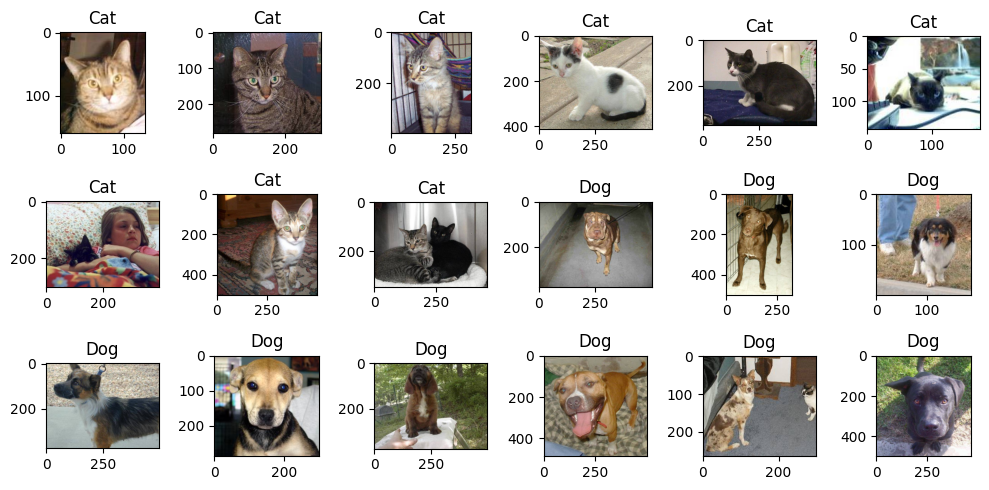

In [5]:
# define locations of datasets
cat_folder = 'training_set/cats/'
dog_folder = 'training_set/dogs/'

# plot first few images of cats
plt.figure(figsize=(10, 5))
for i in range(9):
	plt.subplot(3, 6, i + 1)
	filename = cat_folder + 'cat.' + str(i) + '.jpg'
	image = imread(filename)
	plt.imshow(image)
	plt.title("Cat")

# plot first few images of dogs
for i in range(9):
	plt.subplot(3, 6, i + 10)
	filename = dog_folder + 'dog.' + str(i) + '.jpg'
	image = imread(filename)
	plt.imshow(image)
	plt.title("Dog")

# show the figure
plt.tight_layout()
plt.show()

normalizing the data

In [6]:
"""def process(image, label):
    image = tf.image.resize(image, [256, 256])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

training_set = training_set.map(process)
test_set = test_set.map(process)"""

'def process(image, label):\n    image = tf.image.resize(image, [256, 256])\n    image = tf.cast(image, tf.float32) / 255.0\n    return image, label\n\ntraining_set = training_set.map(process)\ntest_set = test_set.map(process)'

Custom model

In [7]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [9]:
history = model.fit_generator(training_set,steps_per_epoch=training_set.samples//20,epochs=15,validation_data=test_set,validation_steps=test_set.samples//20)


C:\Users\zeidh\AppData\Local\Temp\ipykernel_26484\685501849.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,steps_per_epoch=training_set.samples//20,epochs=15,validation_data=test_set,validation_steps=test_set.samples//20)


Epoch 1/15
400/400 [==============================] - 276s 635ms/step - loss: 0.6431 - accuracy: 0.6155 - val_loss: 0.5663 - val_accuracy: 0.7020
Epoch 2/15
400/400 [==============================] - 75s 188ms/step - loss: 0.5351 - accuracy: 0.7305 - val_loss: 0.5016 - val_accuracy: 0.7663
Epoch 3/15
400/400 [==============================] - 69s 172ms/step - loss: 0.4576 - accuracy: 0.7847 - val_loss: 0.4964 - val_accuracy: 0.7644
Epoch 4/15
400/400 [==============================] - 53s 133ms/step - loss: 0.4095 - accuracy: 0.8080 - val_loss: 0.4644 - val_accuracy: 0.7926
Epoch 5/15
400/400 [==============================] - 53s 133ms/step - loss: 0.3512 - accuracy: 0.8440 - val_loss: 0.4675 - val_accuracy: 0.7851
Epoch 6/15
400/400 [==============================] - 54s 135ms/step - loss: 0.3009 - accuracy: 0.8739 - val_loss: 0.4912 - val_accuracy: 0.7812
Epoch 7/15
400/400 [==============================] - 55s 138ms/step - loss: 0.2534 - accuracy: 0.8959 - val_loss: 0.4719 - val_a

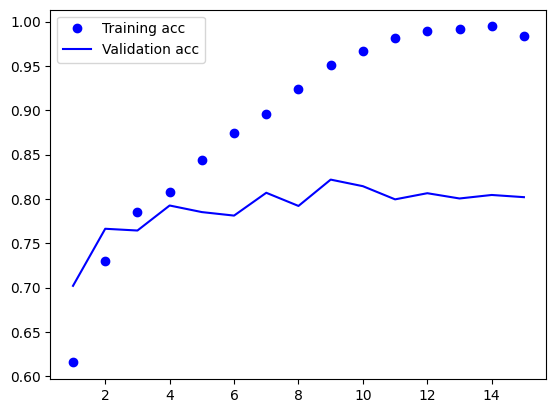

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

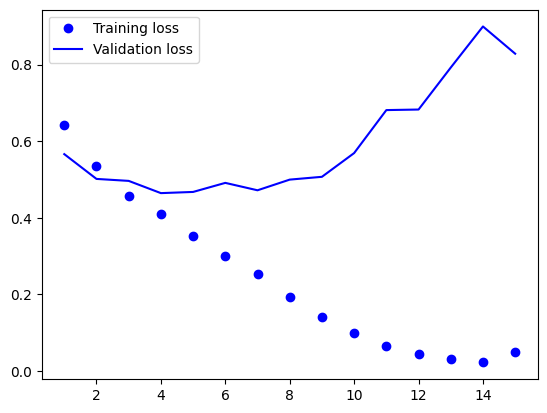

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

In [12]:
model.save('catanddog.h5')

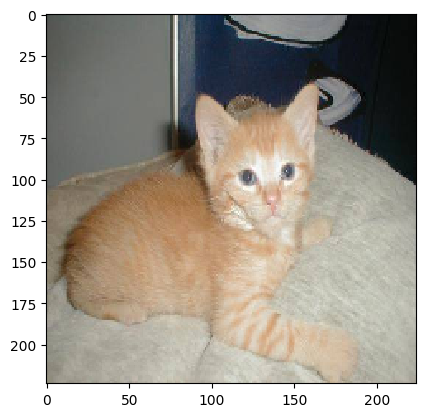

In [16]:

path ='test_set/cats/cat.4310.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [17]:
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [18]:
img_array=img_array.reshape(1,224,224,3)

In [19]:
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')

1/1 [==============================] - 1s 708ms/step
cat
